In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
from sklearn.model_selection import  StratifiedShuffleSplit,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import StratifiedKFold

import matplotlib as mpl
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_moons,make_blobs
from sklearn.cluster import DBSCAN

### DBSCAN - moons - compare to KMeans & AgglomerativeClustering
we can see that kmeans and agg alg. were unable to separate the two clusters

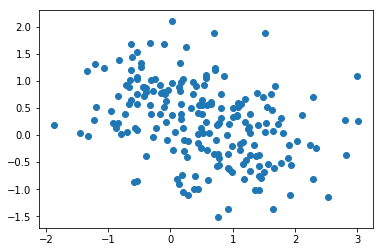

In [3]:
X,y = make_moons(n_samples=200,noise=0.5)
plt.scatter(X[:,0],X[:,1])
plt.show()



In [6]:
kmeans = KMeans(n_clusters=2)
y_kmeans  = kmeans.fit_predict(X)


agg = AgglomerativeClustering(n_clusters=2,linkage='complete')
y_agg = agg.fit_predict(X)

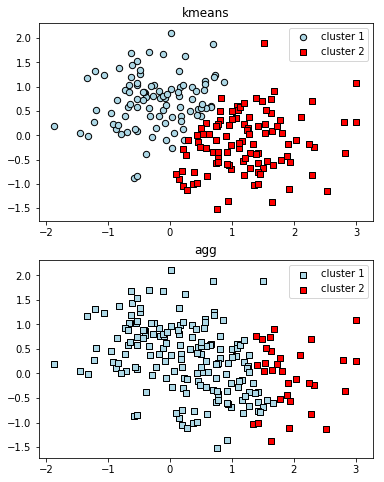

In [7]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(6,8))
ax1.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],
           c='lightblue',edgecolor='black',marker='o',s = 40,
           label='cluster 1')
ax1.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],
           c='red',edgecolor='black',marker='s',s = 40,
           label='cluster 2')
ax1.set_title('kmeans')
ax1.legend(loc='upper right')

ax2.scatter(X[y_agg==0,0],X[y_agg==0,1],
           c='lightblue',edgecolor='black',marker='s',s = 40,
           label='cluster 1')

ax2.scatter(X[y_agg==1,0],X[y_agg==1,1],
           c='red',edgecolor='black',marker='s',s = 40,
           label='cluster 2')

ax2.set_title('agg')
ax2.legend(loc='upper right')

plt.show()



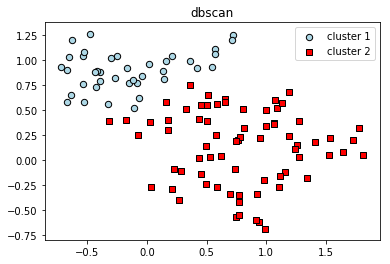

In [10]:
#eps more than 0.2 -> could be 1 cluster , eps less than 0.2 could be more than 2 clusters
dbscan = DBSCAN(eps=0.2
                ,min_samples=5)
y_dbscan = dbscan.fit_predict(X)


plt.scatter(X[y_dbscan==0,0],X[y_dbscan==0,1],
           c='lightblue',edgecolor='black',marker='o',s = 40,
           label='cluster 1')
plt.scatter(X[y_dbscan==1,0],X[y_dbscan==1,1],
           c='red',edgecolor='black',marker='s',s = 40,
           label='cluster 2')
plt.title('dbscan')
plt.legend(loc='upper right')

plt.show()

### DBSCAN - blobs 

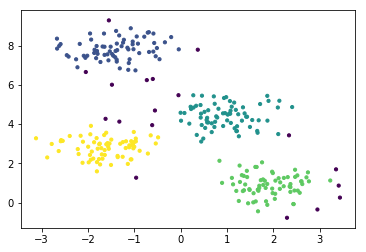

In [12]:
X,y = make_blobs(n_samples=300,centers=4,cluster_std=0.6,random_state=0)

dbscan = DBSCAN(eps=0.5,min_samples=5).fit(X)
labels = dbscan.labels_

plt.scatter(X[:,0],X[:,1],c=labels,s=10,cmap='viridis')
